In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pylab as plt
from environments import *
from agents import *
import itertools

from tqdm import *

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Chapter 2: Multi-armed Bandits 

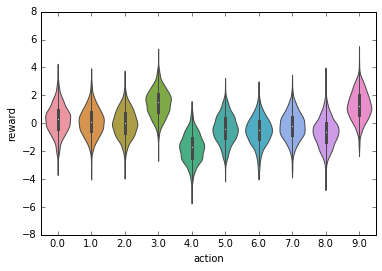

In [2]:
env = BanditEnvironment()
env.display()

##  Greedy agent: Stationary problem

In [3]:
results = []
for epsilon in [0.1,0.01,0.0]:
    agents = []
    for _ in tqdm(range(2000)):
        env = BanditEnvironment()
        agent = GreedyBanditAgent(epsilon=epsilon,learning_rate=None,action_space=10)
        for _ in range(1000):
            action = agent.choose()
            reward = env.step(action)
            agent.update_agent(action,reward)
        agents.append(agent)
    rewards = np.vstack([np.array(agent.rewards)[:,1] for agent in agents])
    results.append((epsilon,q0,rewards))

 32%|███▏      | 637/2000 [00:33<01:11, 19.07it/s]

KeyboardInterrupt: 

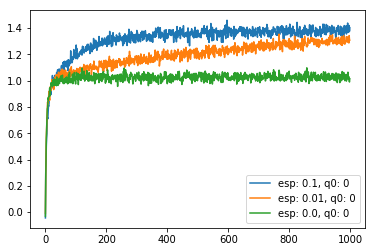

In [201]:
for espilon,q0,r in results:
    q0=0
    plt.plot(r.mean(axis=0),label='esp: {}, q0: {}'.format(espilon,q0))
plt.legend()

##  Greedy agent: Non-Stationary problem

In [212]:
results = []
for epsilon in [0.1,0.0]:
    agents = []
    for _ in tqdm(range(2000)):
        env = RandomWalkBanditEnvironment()
        agent = GreedyBanditAgent(epsilon=epsilon,learning_rate=None,action_space=10)
        for _ in range(1000):
            action = agent.choose()
            reward = env.step(action)
            agent.update_agent(action,reward)
        agents.append(agent)
    rewards = np.vstack([np.array(agent.rewards)[:,1] for agent in agents])
    results.append((epsilon,q0,rewards))

100%|██████████| 2000/2000 [02:08<00:00, 15.51it/s]


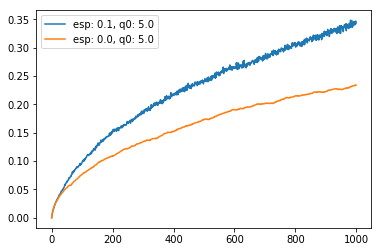

In [213]:
for espilon,q0,r in results:
    plt.plot(r.mean(axis=0),label='esp: {}, q0: {}'.format(espilon,q0))
plt.legend()

## Greedy agent: Optimistic Initial Values

In [145]:
results = []
epsilons = [0.1,0.0]
q0s = [0.0,5.0]
for epsilon,q0 in itertools.product(epsilons,q0s):
    agents = []
    for _ in tqdm(range(2000)):
        env = BanditEnvironment()
        agent = GreedyBanditAgent(epsilon=epsilon,learning_rate=None,action_space=10,q0=q0)
        for _ in range(1000):
            action = agent.choose()
            reward = env.step(action)
            agent.update_agent(action,reward)
        agents.append(agent)
    rewards = np.vstack([np.array(agent.rewards)[:,1] for agent in agents])
    results.append((epsilon,q0,rewards))

array([-1.6478532 , -1.01169689, -0.55453591, -0.49379001,  1.99072134,
       -0.85237079, -0.52802086, -0.99158036, -0.32539335, -0.90624318])

In [ ]:
for espilon,q0,r in results:
    plt.plot(r.mean(axis=0),label='esp: {}, q0: {}'.format(espilon,q0))
plt.legend()

# Upper-Confidence-Bound agent.

In [229]:
results = []
for agent_mode in ['UCB','greedy']:
    agents = []
    for _ in tqdm(range(2000)):
        env = BanditEnvironment()
        if agent_mode == 'UCB':
            agent = UCBBanditAgent(c=2,learning_rate=None,action_space=10)
        else:
            agent = GreedyBanditAgent(epsilon=0.1,learning_rate=None,action_space=10)
        for _ in range(1000):
            action = agent.choose()
            reward = env.step(action)
            agent.update_agent(action,reward)
        agents.append(agent)
    rewards = np.vstack([np.array(agent.rewards)[:,1] for agent in agents])
    results.append((agent_mode,rewards))

100%|██████████| 2000/2000 [01:53<00:00, 17.69it/s]


In [ ]:
for agent_mode,r in results:
    plt.plot(r.mean(axis=0),label='mode {}'.format(agent_mode))
plt.legend()